In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

In [ ]:
data = ('Equities_ETFTradeFile_20230612_1.csv')
df = pd.read_csv(data, sep=';')

display(df)

In [ ]:
df.info()

In [ ]:
df['RptDt'] = pd.to_datetime(df['RptDt'], format='%Y-%m-%d')
df['RptDt'] = df['RptDt'].sort_values(ascending=True)


df['FrstPric'] = df['FrstPric'].sort_values(ascending=True)
df_filtred = df[df['FrstPric'] >= 100.00]
#display(df_filtred)

df_year_TckrSymb = df_filtred[['RptDt','TckrSymb','FrstPric']]
df_year_TckrSymb['year'] = df_filtred.RptDt.dt.year
df_year_TckrSymb.drop(columns='RptDt', inplace=True)
df_year_TckrSymb.sort_values(by='FrstPric', ascending=True, inplace=True)


display(df_year_TckrSymb)

C:\Users\larag\AppData\Local\Temp\ipykernel_14332\3176074249.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axs = sns.barplot(data=df_year_TckrSymb, x='TckrSymb', y='FrstPric', palette = paletta, edgecolor= CINZA4)


AttributeError: 'Text' object has no property 'labelcolor'

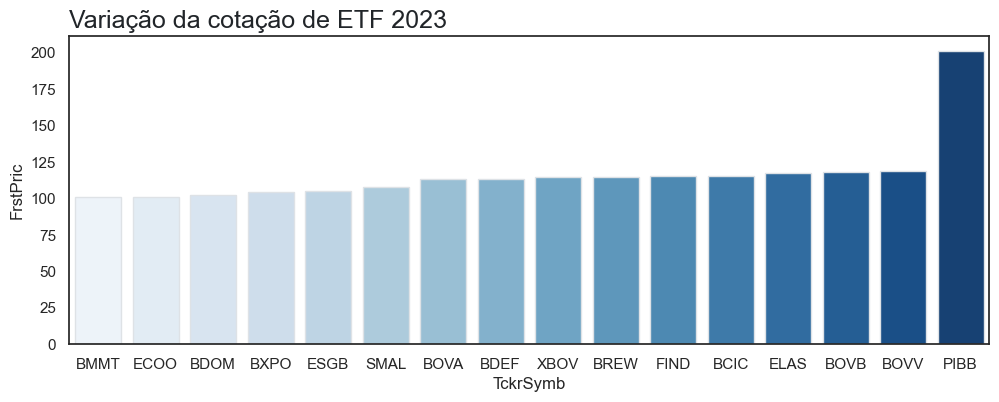

In [108]:
def gerar_grafico_variacao_cotacao():
    
    #Area do grafico
    fig, axs = plt.subplots(figsize=(16,4))
    fig.subplots_adjust(right=0.7)
    sns.set_theme(style='white')

    #Paleta de cores
    paletta = sns.color_palette('Blues', len(df_year_TckrSymb))
    
    #cores = [AZUL4, AZUL3, AZUL2, AZUL1,VERDE1, VERDE2]

    #Gerando o grafico
    axs = sns.barplot(data=df_year_TckrSymb, x='TckrSymb', y='FrstPric', palette = paletta, edgecolor= CINZA4)

    #Personalizando o gráfico
    axs.set_title('Variação da cotação de ETF 2023', fontsize=18, color=CINZA1, loc='left')
    axs.text(0.5, 0.95, 'Top ETF acima de 100 reais', fontsize=14, color=CINZA1, loc='left')
    axs.set_xlabel('ETF')
    axs.set_ylabel('')
    axs.set_yticklabels([])
    sns.despine(left = True, bottom = True)

    # Valores das barras
    for i, bar in enumerate(axs.patches):
        valor = bar.get_height()
        qtd = f'R$ {valor:,.1f}'.replace(',', '.')  
        axs.text(bar.get_x() + bar.get_width()/2, bar.get_height(), qtd, 
                color=CINZA2, fontsize=8, fontweight='bold', ha='center', va='bottom' )

    plt.show()
    
    return axs

gerar_grafico_variacao_cotacao()